In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Datasets/US_honey.csv')
df

,Unnamed: 0,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
0,0,Alabama,16000,58,928000,28000,62.00,575000,1995
1,1,Arizona,52000,79,4108000,986000,68.00,2793000,1995
2,2,Arkansas,50000,60,3000000,900000,64.00,1920000,1995
3,3,California,420000,93,39060000,4687000,60.00,23436000,1995
4,4,Colorado,45000,60,2700000,1404000,68.00,1836000,1995
...,...,...,...,...,...,...,...,...,...
1110,1110,Virginia,6000,40,79000,79000,8.23,1975000,2021
1111,1111,Washington,96000,32,1206000,1206000,2.52,7741000,2021
1112,1112,WestVirginia,6000,43,136000,136000,4.80,1238000,2021
1113,1113,Wisconsin,42000,47,750000,750000,2.81,5547000,2021


In [3]:
df.head()

,Unnamed: 0,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
0,0,Alabama,16000,58,928000,28000,62.0,575000,1995
1,1,Arizona,52000,79,4108000,986000,68.0,2793000,1995
2,2,Arkansas,50000,60,3000000,900000,64.0,1920000,1995
3,3,California,420000,93,39060000,4687000,60.0,23436000,1995
4,4,Colorado,45000,60,2700000,1404000,68.0,1836000,1995


In [4]:
df.shape

(1115, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           1115 non-null   int64  
 1   state                1115 non-null   object 
 2   colonies_number      1115 non-null   int64  
 3   yield_per_colony     1115 non-null   int64  
 4   production           1115 non-null   int64  
 5   stocks               1115 non-null   int64  
 6   average_price        1115 non-null   float64
 7   value_of_production  1115 non-null   int64  
 8   year                 1115 non-null   int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 78.5+ KB


In [6]:
df.isnull().sum()

Unnamed: 0             0
state                  0
colonies_number        0
yield_per_colony       0
production             0
stocks                 0
average_price          0
value_of_production    0
year                   0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [9]:
df.head()

,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
0,Alabama,16000,58,928000,28000,62.0,575000,1995
1,Arizona,52000,79,4108000,986000,68.0,2793000,1995
2,Arkansas,50000,60,3000000,900000,64.0,1920000,1995
3,California,420000,93,39060000,4687000,60.0,23436000,1995
4,Colorado,45000,60,2700000,1404000,68.0,1836000,1995


In [10]:
df.columns

Index(['state', 'colonies_number', 'yield_per_colony', 'production', 'stocks',
       'average_price', 'value_of_production', 'year'],
      dtype='object')

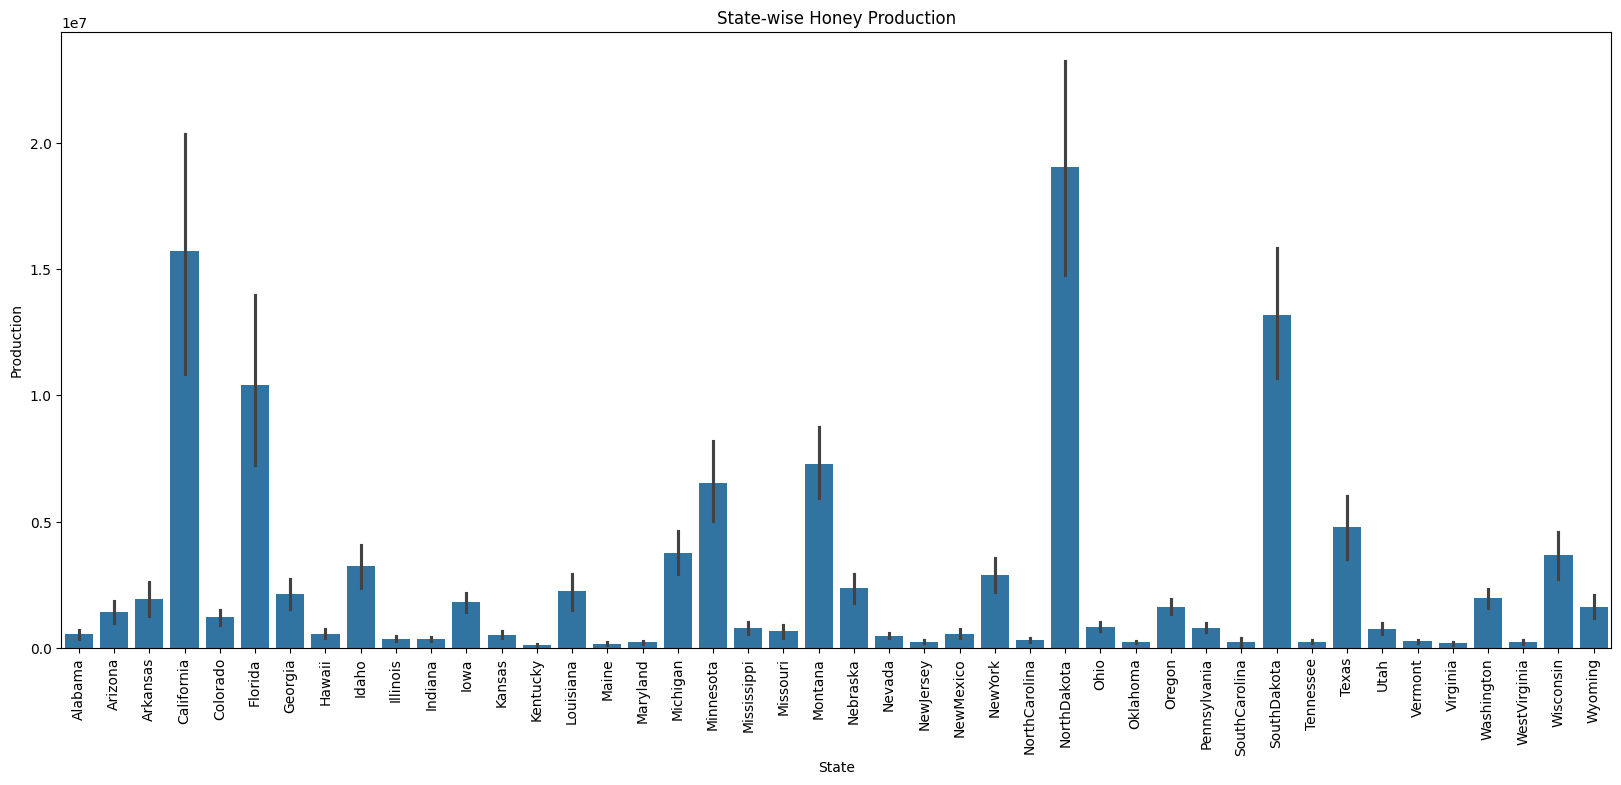

In [11]:
#State-wise production
plt.figure(figsize=(20,8))
sns.barplot(x='state',y='production',data=df)
plt.title('State-wise Honey Production')
plt.xlabel('State')
plt.ylabel('Production')
plt.xticks(rotation=90)
plt.show()

**Top and bottom 5 states v/s Avg_price,Production**

In [12]:
states_production=df.groupby('state')['production'].sum().reset_index()
states_production

,state,production
0,Alabama,14467000
1,Arizona,38844000
2,Arkansas,51846000
3,California,423876000
4,Colorado,32660000
5,Florida,280934000
6,Georgia,57426000
7,Hawaii,15420000
8,Idaho,87188000
9,Illinois,9864000


In [13]:
Top_5_states_prod=states_production.sort_values(by='production',ascending=False).head()

In [14]:
Top_5_states_prod

,state,production
28,NorthDakota,513742000
3,California,423876000
34,SouthDakota,355726000
5,Florida,280934000
21,Montana,197173000


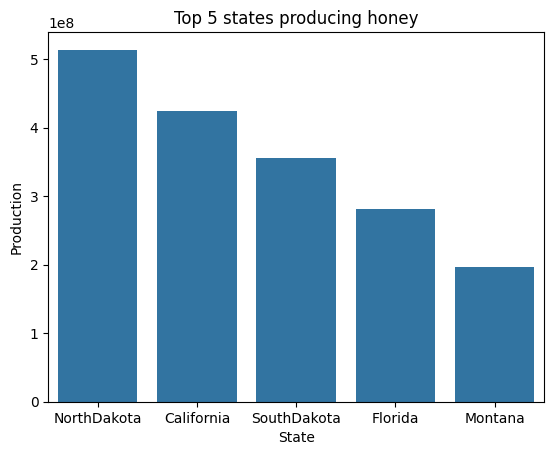

In [15]:
sns.barplot(x='state',y='production',data=Top_5_states_prod)
plt.title('Top 5 states producing honey')
plt.xlabel('State')
plt.ylabel('Production')
plt.show()

**Bottom 5 states**

In [16]:
Bottom_5_states_prod=states_production.sort_values(by='production',ascending=True).head()

In [17]:
Bottom_5_states_prod

,state,production
16,Maryland,1975000
30,Oklahoma,2055000
33,SouthCarolina,2823000
13,Kentucky,3224000
15,Maine,4762000


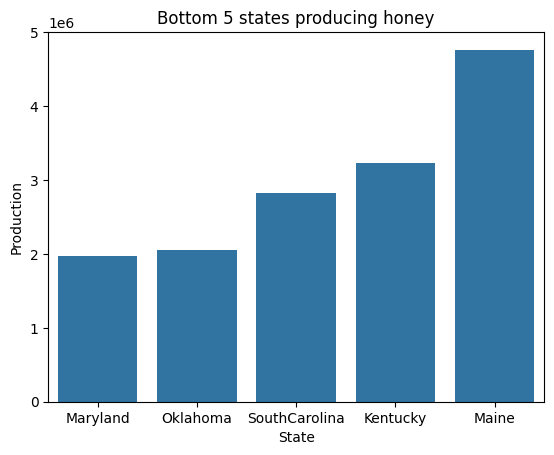

In [18]:
sns.barplot(x='state',y='production',data=Bottom_5_states_prod)
plt.title('Bottom 5 states producing honey')
plt.xlabel('State')
plt.ylabel('Production')
plt.show()

**What is the Change in mean Average price of Honey from 1995 to 2021?**

In [19]:
mean_avg=df.groupby('year')['average_price'].mean()
mean_avg.reset_index()

,year,average_price
0,1995,74.840909
1,1996,99.568182
2,1997,91.325581
3,1998,83.720930
4,1999,80.325581
5,2000,79.023256
6,2001,88.465116
7,2002,133.204545
8,2003,151.068182
9,2004,132.350000


In [20]:
change_mean=mean_avg.loc[1995]-mean_avg.loc[2021]
change_mean

71.5066590909091

 **Which was the year when production of Honey in wholeUS was the highest?**

In [21]:
highest_prod=df.groupby('year')['production'].sum().reset_index()
highest_prod.head()

,year,production
0,1995,210272000
1,1996,197995000
2,1997,191176000
3,1998,219321000
4,1999,204585000


In [22]:
highest_prod.sort_values(by='production',ascending=False).head(1)

,year,production
5,2000,220320000


**From the above inference we get the production was highest in the year 2000, now lets infer which state was having highest contribution in that year.**

In [23]:
highest_prod_state=df.groupby(['state','year'])['production'].sum().reset_index()
highest_prod_state.head()

,state,year,production
0,Alabama,1995,928000
1,Alabama,1996,1024000
2,Alabama,1997,924000
3,Alabama,1998,1136000
4,Alabama,1999,1156000


In [24]:
state_2000_year=highest_prod_state.loc[(highest_prod_state['year']==2000)]
state_2000_year.head()

,state,year,production
5,Alabama,2000,1248000
32,Arizona,2000,2360000
59,Arkansas,2000,5115000
86,California,2000,30800000
113,Colorado,2000,1740000


In [25]:
state_2000_year.sort_values(by='production',ascending=False).head(1)

,state,year,production
721,NorthDakota,2000,33350000


**Which states have the highest no. of colonies in the year 2000?**

In [26]:
df.columns

Index(['state', 'colonies_number', 'yield_per_colony', 'production', 'stocks',
       'average_price', 'value_of_production', 'year'],
      dtype='object')

In [27]:
highest_colony=df.groupby(['state','year'])['colonies_number'].sum().reset_index()
highest_colony.head()

,state,year,colonies_number
0,Alabama,1995,16000
1,Alabama,1996,16000
2,Alabama,1997,14000
3,Alabama,1998,16000
4,Alabama,1999,17000


In [28]:
state_2000_colony=highest_colony.loc[(highest_colony['year']==2000)]
state_2000_colony.head()

,state,year,colonies_number
5,Alabama,2000,16000
32,Arizona,2000,40000
59,Arkansas,2000,55000
86,California,2000,440000
113,Colorado,2000,29000


In [29]:
result=state_2000_colony.loc[state_2000_colony['colonies_number'].idxmax()]
result

state              California
year                     2000
colonies_number        440000
Name: 86, dtype: object